# **GAME OF THRONES**:

La serie "A Song of Fire and Ice" consta de 5 libros, aunque parece ser que ya se está escribiendo un sexto "The Winds of Winter" y que se piensa en un séptimo "A Dream of Spring". El primero es "A Game of Thrones".

https://www.kaggle.com/mylesoneill/game-of-thrones

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [ ]:
characters = pd.read_csv('character-predictions.csv')
characters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No               1946 non-null   int64  
 1   actual             1946 non-null   int64  
 2   pred               1946 non-null   int64  
 3   alive              1946 non-null   float64
 4   plod               1946 non-null   float64
 5   name               1946 non-null   object 
 6   title              938 non-null    object 
 7   male               1946 non-null   int64  
 8   culture            677 non-null    object 
 9   dateOfBirth        433 non-null    float64
 10  DateoFdeath        444 non-null    float64
 11  mother             21 non-null     object 
 12  father             26 non-null     object 
 13  heir               23 non-null     object 
 14  house              1519 non-null   object 
 15  spouse             276 non-null    object 
 16  book1              1946 

# **DATA CLEANING**

In [ ]:
# Vamos a quitar los siguientes atributos:

characters = characters.drop(['S.No', 'actual', 'pred', 'alive', 'plod'], axis=1)

In [ ]:
porcentajes = (characters.isnull().sum()/len(characters))*100
porcentajes

name                  0.000000
title                51.798561
male                  0.000000
culture              65.210689
dateOfBirth          77.749229
DateoFdeath          77.183967
mother               98.920863
father               98.663926
heir                 98.818088
house                21.942446
spouse               85.817061
book1                 0.000000
book2                 0.000000
book3                 0.000000
book4                 0.000000
book5                 0.000000
isAliveMother        98.920863
isAliveFather        98.663926
isAliveHeir          98.818088
isAliveSpouse        85.817061
isMarried             0.000000
isNoble               0.000000
age                  77.749229
numDeadRelations      0.000000
boolDeadRelations     0.000000
isPopular             0.000000
popularity            0.000000
isAlive               0.000000
dtype: float64

In [ ]:
# Quitamos aquellos atributos que tienen más de un 70 % de valores nulos

characters = characters.drop(['mother', 'father', 'heir', 'spouse', 'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse'], axis=1)
characters = characters.drop(['dateOfBirth', 'DateoFdeath', 'age'], axis=1)

In [ ]:
porcentajes = (characters.isnull().sum()/len(characters))*100
porcentajes

name                  0.000000
title                51.798561
male                  0.000000
culture              65.210689
house                21.942446
book1                 0.000000
book2                 0.000000
book3                 0.000000
book4                 0.000000
book5                 0.000000
isMarried             0.000000
isNoble               0.000000
numDeadRelations      0.000000
boolDeadRelations     0.000000
isPopular             0.000000
popularity            0.000000
isAlive               0.000000
dtype: float64

In [ ]:
characters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1946 non-null   object 
 1   title              938 non-null    object 
 2   male               1946 non-null   int64  
 3   culture            677 non-null    object 
 4   house              1519 non-null   object 
 5   book1              1946 non-null   int64  
 6   book2              1946 non-null   int64  
 7   book3              1946 non-null   int64  
 8   book4              1946 non-null   int64  
 9   book5              1946 non-null   int64  
 10  isMarried          1946 non-null   int64  
 11  isNoble            1946 non-null   int64  
 12  numDeadRelations   1946 non-null   int64  
 13  boolDeadRelations  1946 non-null   int64  
 14  isPopular          1946 non-null   int64  
 15  popularity         1946 non-null   float64
 16  isAlive            1946 

In [ ]:
# Simplificamos 

cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
    }

def get_cult(value):
    value = value.lower()
    v = [k for (k, v) in cult.items() if value in v]
    return v[0] if len(v) > 0 else value.title()

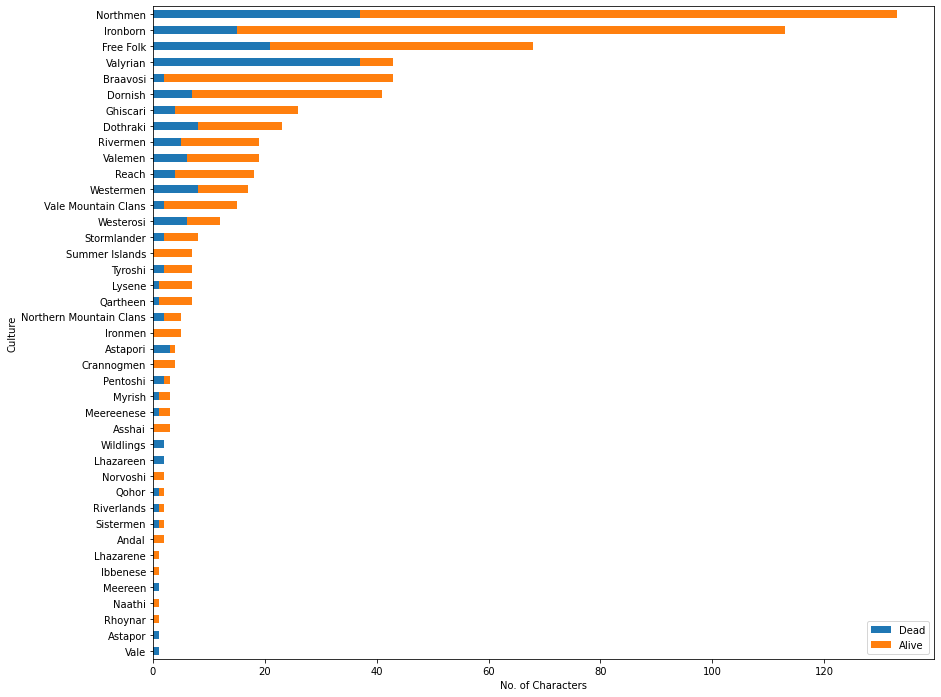

In [ ]:
# Podemos visualizar la relación que existe entre el atributo culture y la supervivencia

characters.loc[:, "culture"] = [get_cult(x) for x in characters.culture.fillna("")]
data = characters.groupby(["culture", "isAlive"]).count()["name"].unstack().copy(deep = True)
data.loc[:, "total"]= data.sum(axis = 1)
p = data[data.index != ""].sort_values("total")[[0, 1]].plot.barh(stacked = True, rot = 0, figsize = (14, 12),)
_ = p.set(xlabel = "No. of Characters", ylabel = "Culture"), p.legend(["Dead", "Alive"], loc = "lower right")

In [ ]:
# Convertimos atributos categóricos no numéricos a numéricos y los valores nulos se reemplazan por -1

characters.loc[:, "culture"] = [get_cult(x) for x in characters.culture.fillna("")]
characters.loc[:, "title"] = pd.factorize(characters.title)[0]
characters.loc[:, "culture"] = pd.factorize(characters.culture)[0]
characters.loc[:, "house"] = pd.factorize(characters.house)[0]

characters.columns = map(lambda x: x.replace(".", "").replace("_", ""), characters.columns)
characters.fillna(value = -1, inplace = True)

In [ ]:
characters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1946 non-null   object 
 1   title              1946 non-null   int64  
 2   male               1946 non-null   int64  
 3   culture            1946 non-null   int64  
 4   house              1946 non-null   int64  
 5   book1              1946 non-null   int64  
 6   book2              1946 non-null   int64  
 7   book3              1946 non-null   int64  
 8   book4              1946 non-null   int64  
 9   book5              1946 non-null   int64  
 10  isMarried          1946 non-null   int64  
 11  isNoble            1946 non-null   int64  
 12  numDeadRelations   1946 non-null   int64  
 13  boolDeadRelations  1946 non-null   int64  
 14  isPopular          1946 non-null   int64  
 15  popularity         1946 non-null   float64
 16  isAlive            1946 

In [ ]:
characters.head()

,name,title,male,culture,house,book1,book2,book3,book4,book5,isMarried,isNoble,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive
0,Viserys II Targaryen,-1,1,0,-1,0,0,0,0,0,0,0,11,1,1,0.605351,0
1,Walder Frey,0,1,1,0,1,1,1,1,1,1,1,1,1,1,0.896321,1
2,Addison Hill,1,1,0,1,0,0,0,1,0,0,1,0,0,0,0.267559,1
3,Aemma Arryn,2,0,0,2,0,0,0,0,0,1,1,0,0,0,0.183946,0
4,Sylva Santagar,3,0,2,3,0,0,0,1,0,1,1,0,0,0,0.043478,1


# **ANALIZANDO LOS DATOS**

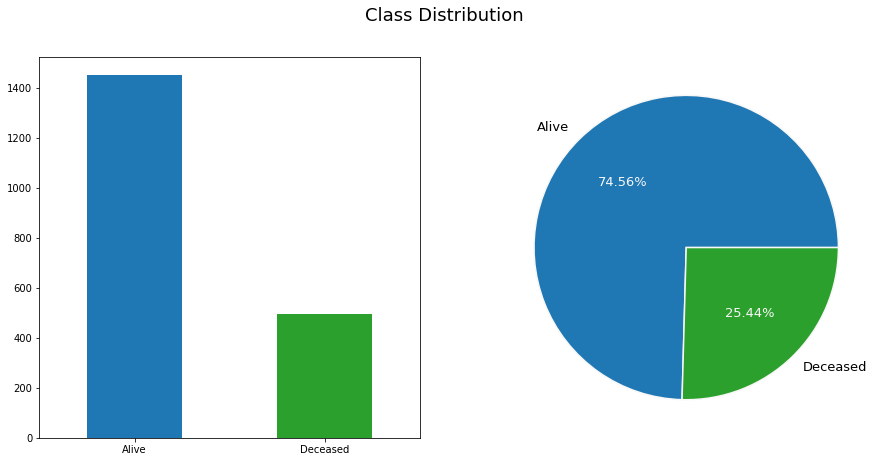

In [ ]:
f, ax = plt.subplots(1, 2, figsize = (15, 7))
f.suptitle("Class Distribution", fontsize = 18.)
_ = characters.isAlive.value_counts().plot.bar(ax = ax[0], rot = 0, color = (sns.color_palette()[0], sns.color_palette()[2])).set(xticklabels = ["Alive", "Deceased"])
_ = characters.isAlive.value_counts().plot.pie(labels = ("Alive", "Deceased"), autopct = "%.2f%%", label = "", fontsize = 13., ax = ax[1],\
colors = (sns.color_palette()[0], sns.color_palette()[2]), wedgeprops = {"linewidth": 1.5, "edgecolor": "#F7F7F7"}), ax[1].texts[1].set_color("#F7F7F7"), ax[1].texts[3].set_color("#F7F7F7")

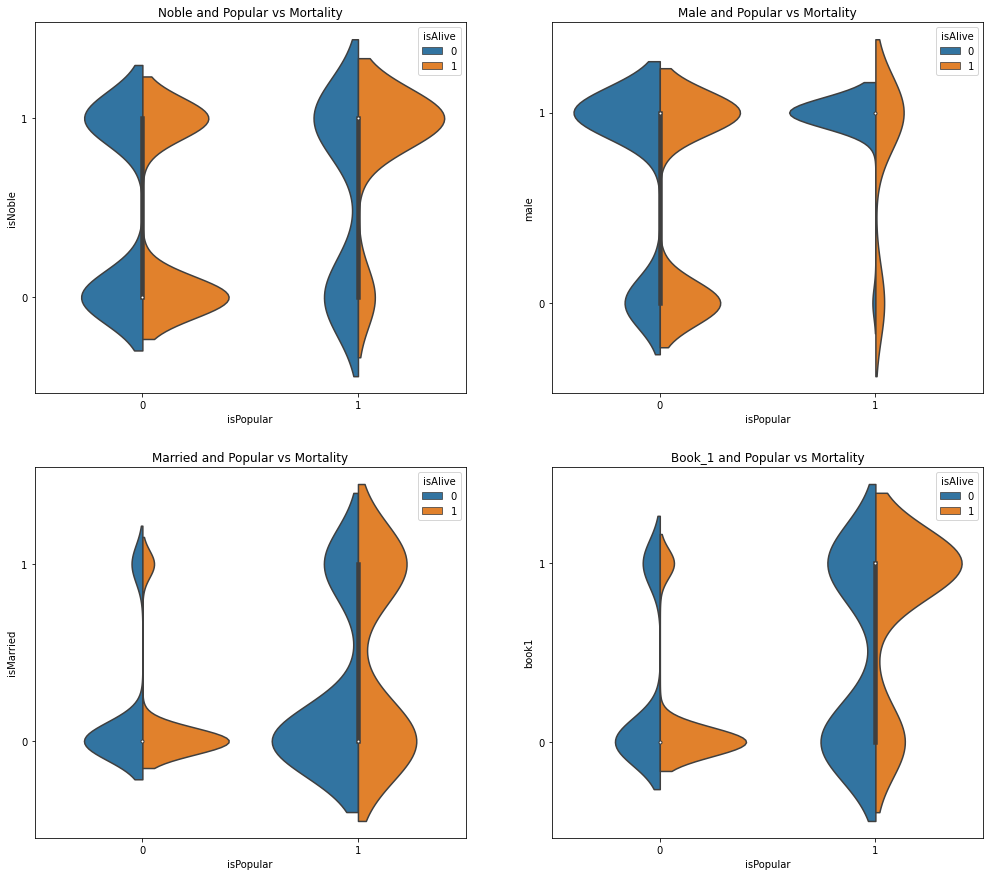

In [ ]:
import warnings
warnings.filterwarnings('ignore')
f,ax=plt.subplots(2,2,figsize=(17,15))
sns.violinplot("isPopular", "isNoble", hue="isAlive", data=characters,split=True, ax=ax[0, 0])
ax[0, 0].set_title('Noble and Popular vs Mortality')
ax[0, 0].set_yticks(range(2))

sns.violinplot("isPopular", "male", hue="isAlive", data=characters ,split=True, ax=ax[0, 1])
ax[0, 1].set_title('Male and Popular vs Mortality')
ax[0, 1].set_yticks(range(2))

sns.violinplot("isPopular", "isMarried", hue="isAlive", data=characters,split=True, ax=ax[1, 0])
ax[1, 0].set_title('Married and Popular vs Mortality')
ax[1, 0].set_yticks(range(2))


sns.violinplot("isPopular", "book1", hue="isAlive", data=characters ,split=True, ax=ax[1, 1])
ax[1, 1].set_title('Book_1 and Popular vs Mortality')
ax[1, 1].set_yticks(range(2))


plt.show()

# **REDUCCIÓN DIMENSIONALIDAD**

## **PCA**

In [ ]:
X = characters[['title', 'male', 'culture', 'house', 'book1', 'book2', 'book3', 'book4', 'book5', 'isMarried', 'isNoble', 'numDeadRelations', 'boolDeadRelations', 'isPopular', 'popularity']]
y = characters['isAlive']

In [ ]:
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2) 
pca.fit(X_scaled) 
X_pca = pca.transform(X_scaled) 

print("shape of X_pca", X_pca.shape)
expl = pca.explained_variance_ratio_
print(expl)
print('suma:',sum(expl[0:5]))

shape of X_pca (1946, 2)
[0.24225645 0.13156997]
suma: 0.37382642576331016


## **CORRELACIÓN**

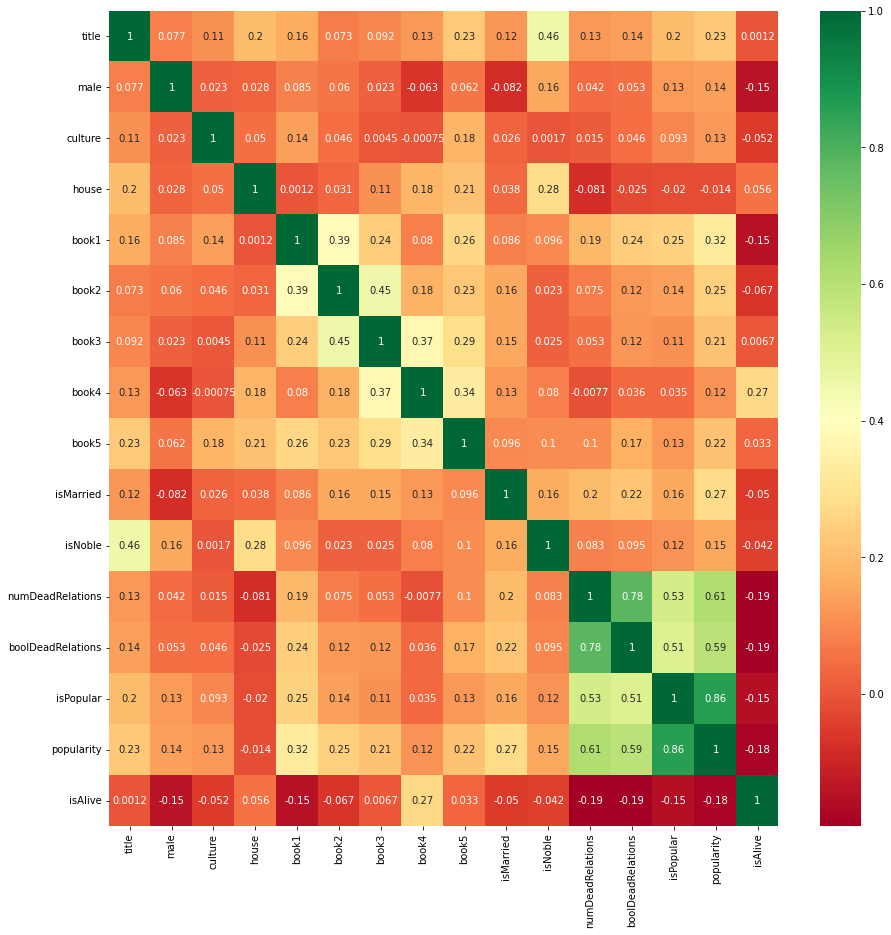

In [ ]:
plt.figure(figsize=(15,15))
g=sns.heatmap(characters.corr(), annot=True, cmap="RdYlGn") 

# **SVC (Support Vector Classification)**

In [ ]:
from sklearn.svm import SVC

X = characters[['title', 'male', 'culture', 'house', 'book1', 'book2', 'book3', 'book4', 'book5', 'isMarried', 'isNoble', 'numDeadRelations', 'boolDeadRelations', 'isPopular', 'popularity']]
y = characters['isAlive']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = SVC(kernel='linear')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.7307692307692307


# **DECISION TREE**

In [ ]:
# Split data keeping 80% for training and the rest for test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
! pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn import tree
import graphviz

clf = tree.DecisionTreeClassifier(random_state=0)
#Entrenamos
clf = clf.fit(X_train, y_train)

In [ ]:
y_pred = clf.predict(X_test)
y_pred

array([1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,

In [ ]:
print("Accuracy:", accuracy_score(y_pred, y_test))

Accuracy: 0.7307692307692307


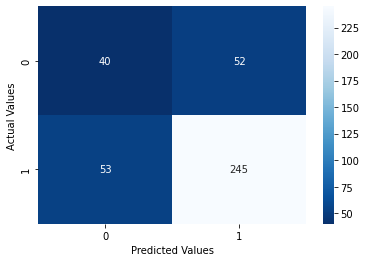

In [ ]:
cm = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues_r' ,fmt='d')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.show()

[Text(0.5, 0.875, 'X[7] <= 0.5\ngini = 0.384\nsamples = 1556\nvalue = [403, 1153]'),
 Text(0.25, 0.625, 'X[14] <= 0.025\ngini = 0.48\nsamples = 651\nvalue = [261, 390]'),
 Text(0.125, 0.375, 'X[14] <= 0.012\ngini = 0.343\nsamples = 377\nvalue = [83, 294]'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'X[14] <= 0.258\ngini = 0.455\nsamples = 274\nvalue = [178, 96]'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'X[14] <= 0.065\ngini = 0.265\nsamples = 905\nvalue = [142, 763]'),
 Text(0.625, 0.375, 'X[14] <= 0.022\ngini = 0.15\nsamples = 528\nvalue = [43, 485]'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'X[1] <= 0.5\ngini = 0.387\nsamples = 377\nvalue = [99, 278]'),
 Text(0.8125, 0.125, '\n  (...)  \n'),
 Text(0.9375, 0.125, '\n  (...)  \n')]

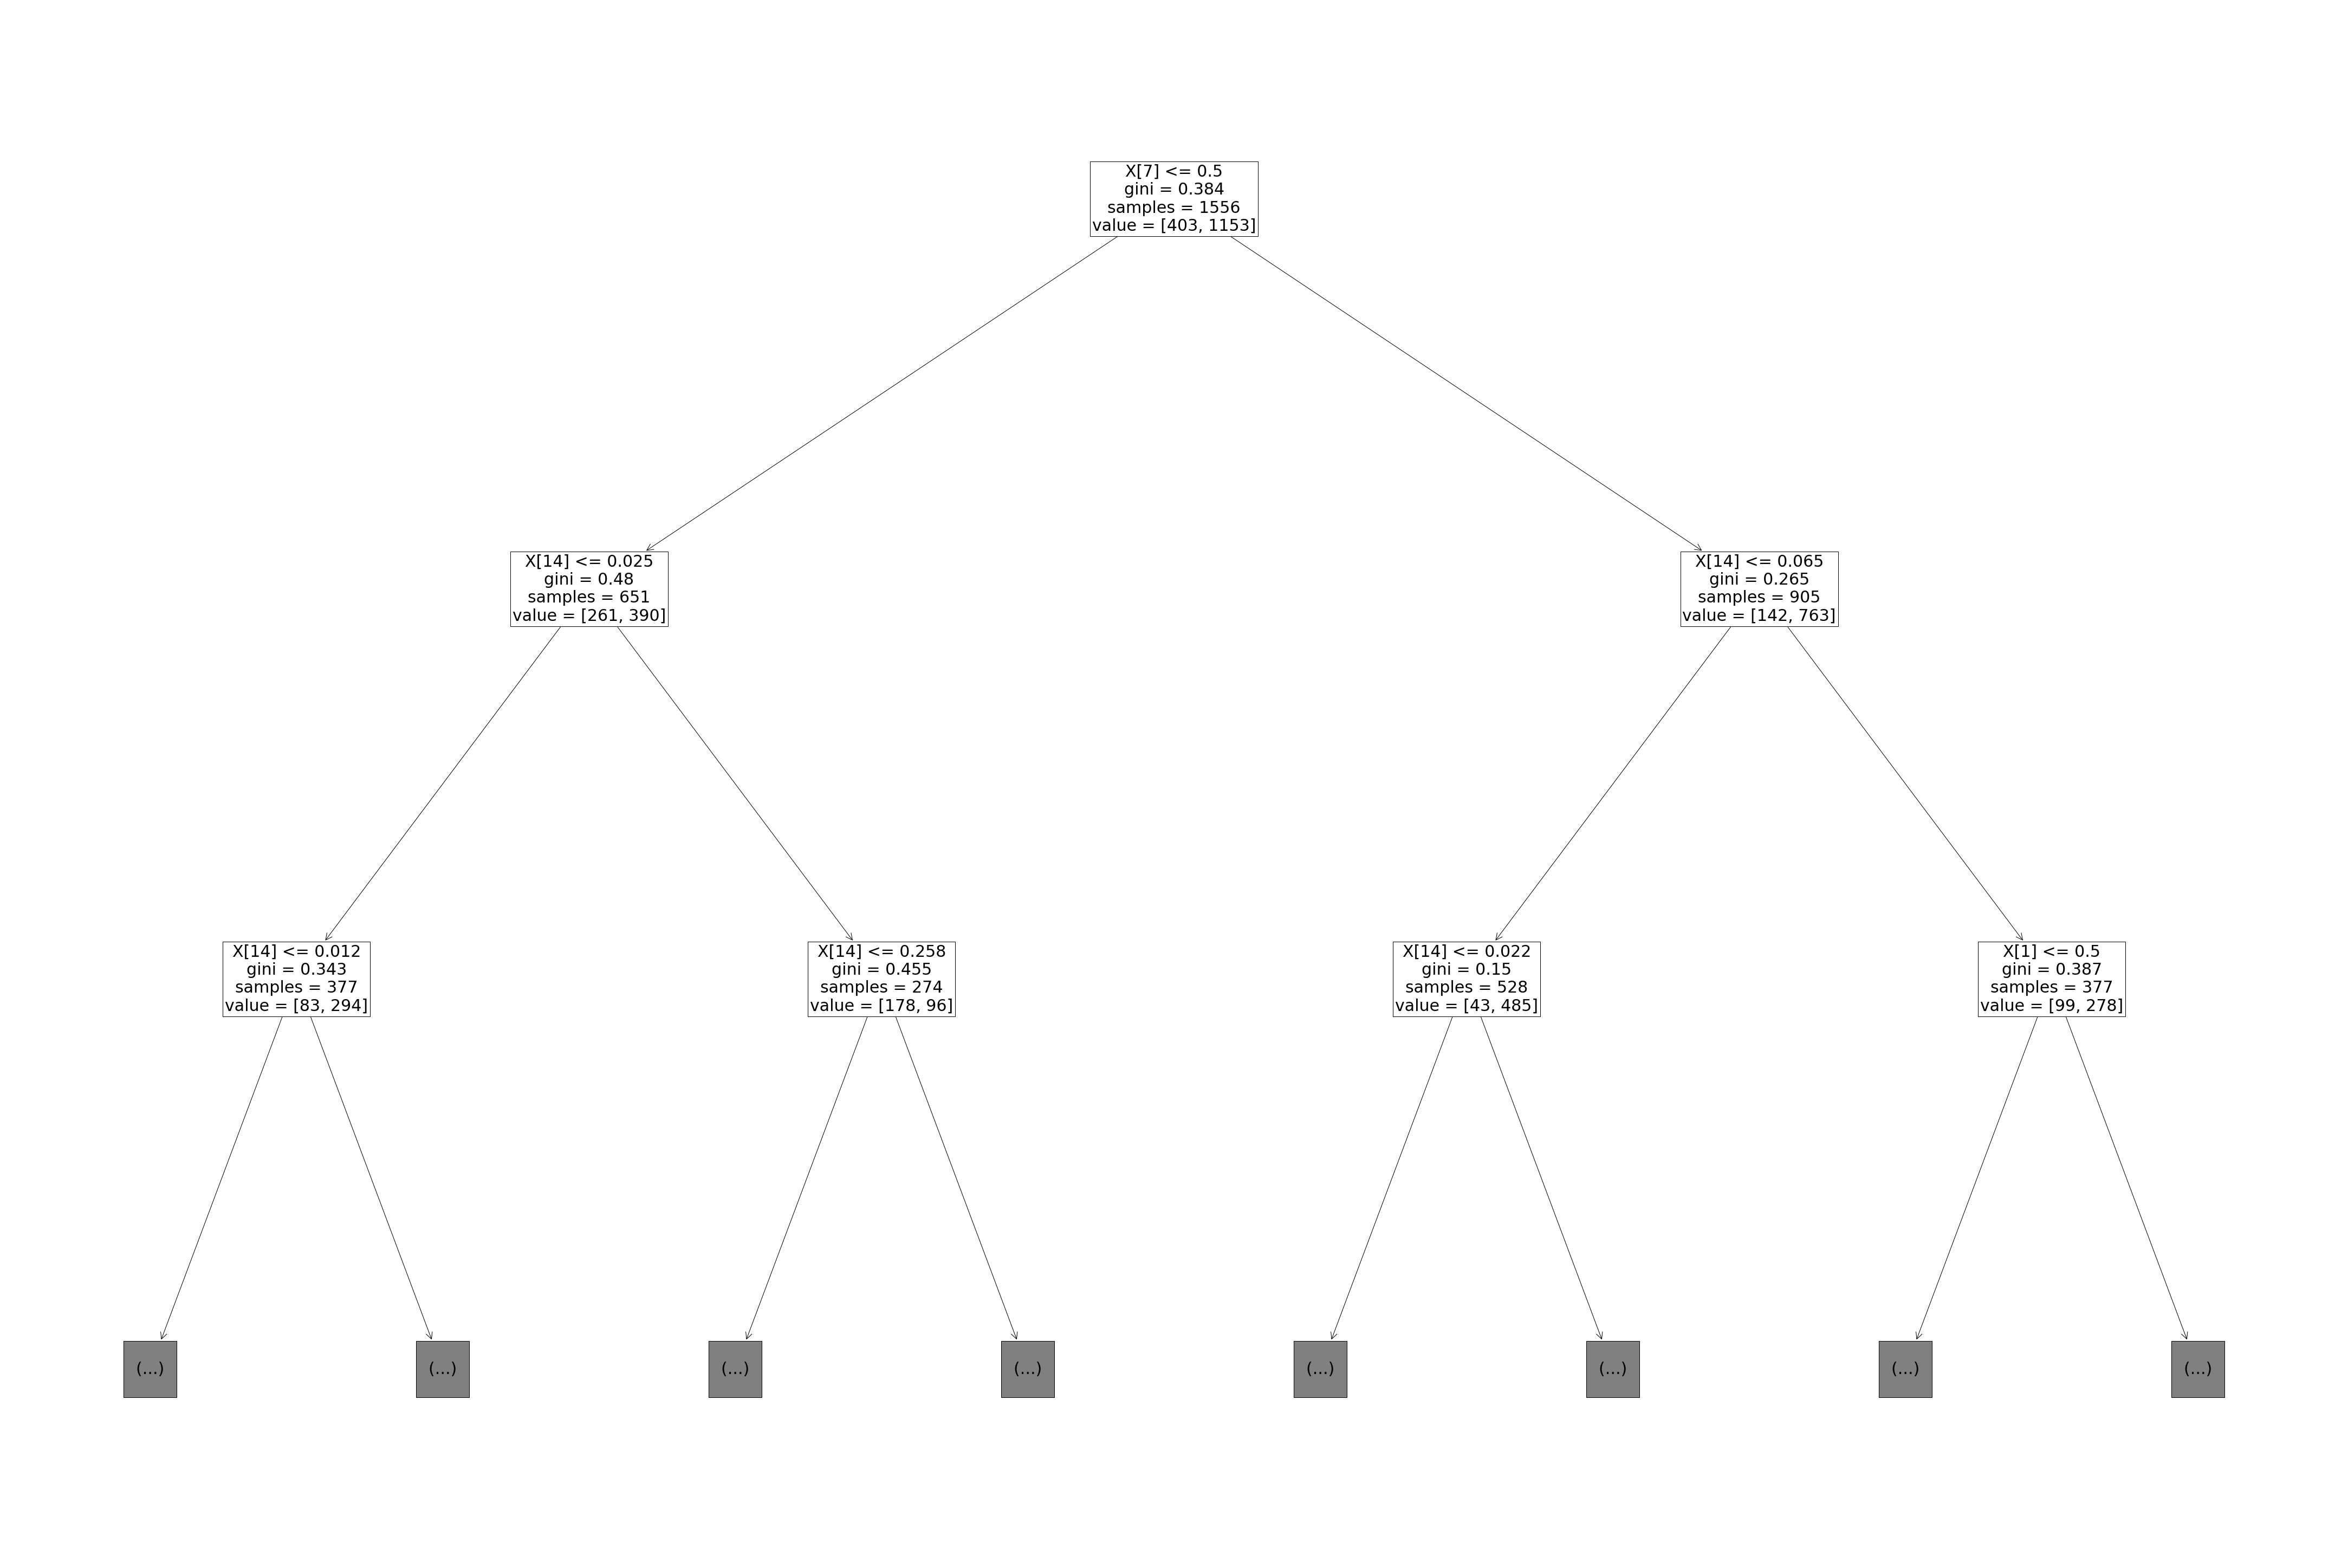

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,10,10])
tree.plot_tree(clf,fontsize=30,ax=ax,max_depth=2) 

# **CLUSTERING**

In [ ]:
# Vamos a eliminar varios atributos
df_clu = characters.drop(['name', 'title', 'boolDeadRelations'] , axis=1)
# Y en vez de book1, book2, book3, book4, book5 lo sustituimos por en cuantos libros aparece el personaje
df_clu['numBooks'] = df_clu.book1 + df_clu.book2 + df_clu.book3 + df_clu.book4 + df_clu.book5
df_clu = df_clu.drop(['book1', 'book2', 'book3', 'book4', 'book5'] , axis=1)
df_clu.head(9)

,male,culture,house,isMarried,isNoble,numDeadRelations,isPopular,popularity,isAlive,numBooks
0,1,0,-1,0,0,11,1,0.605351,0,0
1,1,1,0,1,1,1,1,0.896321,1,5
2,1,0,1,0,1,0,0,0.267559,1,1
3,0,0,2,1,1,0,0,0.183946,0,0
4,0,2,3,1,1,0,0,0.043478,1,1
5,1,0,-1,0,0,5,1,1.000000,1,0
6,1,3,4,1,1,0,1,0.431438,0,0
7,1,0,-1,0,0,5,1,0.678930,0,0
8,1,0,-1,0,1,0,0,0.006689,0,1


In [ ]:
min_max_scaler = preprocessing.MinMaxScaler() 
df = min_max_scaler.fit_transform(df_clu)
df = pd.DataFrame(df) 

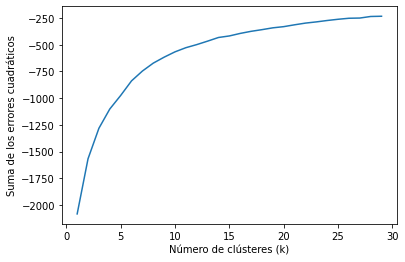

In [ ]:
from sklearn.cluster import KMeans

nc = range(1, 30) # El número de iteraciones que queremos hacer.
kmeans = [KMeans(n_clusters=i) for i in nc]
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))]
score
plt.xlabel('Número de clústeres (k)')
plt.ylabel('Suma de los errores cuadráticos')
plt.plot(nc,score)

In [ ]:
kmeans = KMeans(n_clusters=5).fit(df)
centroids = kmeans.cluster_centers_
print(centroids)

[[ 1.00000000e+00  7.42574257e-02  1.36138614e-01  4.95049505e-02
  -3.88578059e-16  4.78547855e-03  1.48514851e-02  5.40332461e-02
   1.00000000e+00  3.71287129e-01]
 [ 1.22124533e-15  6.79832545e-02  2.74667728e-01  2.42537313e-01
   1.00000000e+00  3.48258706e-02  4.10447761e-02  8.04797085e-02
   8.09701493e-01  3.99253731e-01]
 [ 1.00000000e+00  7.72732382e-02  3.03436965e-01  1.58986175e-01
   1.00000000e+00  1.76651306e-02  8.29493088e-02  1.10722377e-01
   1.00000000e+00  4.76958525e-01]
 [ 8.26576577e-01  8.92111624e-02  1.85547940e-01  1.35135135e-01
   4.39189189e-01  4.42942943e-02  1.32882883e-01  1.43398415e-01
  -3.21964677e-15  3.96846847e-01]
 [-6.66133815e-16  6.58413402e-02  1.56551102e-01  1.56565657e-01
  -4.44089210e-16  2.69360269e-03  7.57575758e-03  4.85118746e-02
   1.00000000e+00  3.88888889e-01]]


# **RANDOM FOREST CLASSIFIER**

In [ ]:
# Split data keeping 80% for training and the rest for test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

seed = 42
np.random.seed(seed)

# Definimos el algoritmo
bar = RandomForestClassifier(n_estimators=400, n_jobs=-1, random_state=seed)
# Lo entrenamos
bar.fit(X_train, y_train)
# Realizamos la predicción
Y_prob = bar.predict_proba(X_test)
Y_pred = np.argmax(Y_prob, axis=1)

In [ ]:
print('Precisión del modelo:')
print(bar.score(X_train, y_train))

Precisión del modelo:
0.9916452442159382


## **Confusion Matrix**

[Text(33.0, 0.5, 'Actual Class'), Text(0.5, 15.0, 'Predicted Class')]

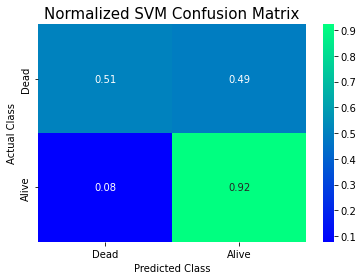

In [ ]:
cm = confusion_matrix(y_test, Y_pred)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

classes = ["Dead", "Alive"]
f, ax = plt.subplots()
ax.set_title("Normalized SVM Confusion Matrix", fontsize=15.)
sns.heatmap(pd.DataFrame(cm, index=classes, columns=classes), 
            cmap='winter', annot=True, fmt='.2f', ax=ax).set(xlabel="Predicted Class", ylabel="Actual Class")

# **DEEP LEARNING**

In [ ]:
X = characters[['title', 'male', 'culture', 'house', 'book1', 'book2', 'book3', 'book4', 'book5', 'isMarried', 'isNoble', 'numDeadRelations', 'boolDeadRelations', 'isPopular', 'popularity']]
y = characters['isAlive']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(15, input_dim=10, activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 15)                240       
                                                                 
 dense_1 (Dense)             (None, 15)                240       
                                                                 
 dense_2 (Dense)             (None, 15)                240       
                                                                 
 dense_3 (Dense)             (None, 1)                 16        
                                                                 
Total params: 736
Trainable params: 736
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=100, batch_size=50, verbose=1)

Epoch 1/100
32/32 [==============================] - 3s 5ms/step - loss: 0.6531 - accuracy: 0.6697
Epoch 2/100
32/32 [==============================] - 0s 6ms/step - loss: 0.5815 - accuracy: 0.7506
Epoch 3/100
32/32 [==============================] - 0s 5ms/step - loss: 0.5386 - accuracy: 0.7571
Epoch 4/100
32/32 [==============================] - 0s 11ms/step - loss: 0.5141 - accuracy: 0.7648
Epoch 5/100
32/32 [==============================] - 0s 12ms/step - loss: 0.5003 - accuracy: 0.7699
Epoch 6/100
32/32 [==============================] - 0s 12ms/step - loss: 0.4901 - accuracy: 0.7744
Epoch 7/100
32/32 [==============================] - 0s 9ms/step - loss: 0.4833 - accuracy: 0.7789
Epoch 8/100
32/32 [==============================] - 0s 4ms/step - loss: 0.4787 - accuracy: 0.7821
Epoch 9/100
32/32 [==============================] - 0s 8ms/step - loss: 0.4747 - accuracy: 0.7802
Epoch 10/100
32/32 [==============================] - 0s 5ms/step - loss: 0.4711 - accuracy: 0.7828
Epoch 

In [ ]:
y_pred = model.predict(X_test)
y_pred = y_pred > 0.5

In [ ]:
score = accuracy_score(y_test, y_pred)
'Accuracy score: %.2f' % (score * 100)

'Accuracy score: 81.03'